# Experiments on synthetic data

In [1]:
%load_ext autoreload
%autoreload 2

Required imports

In [2]:
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from utils.train_synthetic import run_synthetic_experiments
from utils.results import get_joint_coverages, get_interval_widths, plot_timeseries

In [3]:
BASELINES = ['QRNN', 'DPRNN', 'CFRNN', 'AdaptiveCFRNN']

# Static noise profile

In [4]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='static', 
                                  baseline=baseline,
                                  n_train = 2000,
                                  retrain_auxiliary=True,
                                  recompute_dataset=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 81.63126068115234
Epoch: 50	Train loss: 9.25703763961792
Epoch: 100	Train loss: 8.942840671539306
Epoch: 150	Train loss: 8.757949209213256
Epoch: 200	Train loss: 8.199649429321289
Epoch: 250	Train loss: 7.627127695083618
Epoch: 300	Train loss: 9.032912349700927
Epoch: 350	Train loss: 8.269106388092041
Epoch: 400	Train loss: 7.86938247680664
Epoch: 450	Train loss: 7.276825857162476
Epoch: 500	Train loss: 6.920750284194947
Epoch: 550	Train loss: 7.020044136047363
Epoch: 600	Train loss: 6.3405533790588375
Epoch: 650	Train loss: 6.062567138671875
Epoch: 700	Train loss: 6.3192511081695555
Epoch: 750	Train loss: 5.709890127182007
Epoch: 800	Train loss: 5.377541971206665
Epoch: 850	Train loss: 5.689974737167359
Epoch: 900	Train loss: 5.771847724914551
Epoch: 950	Train loss: 5.192333173751831
Training dataset 1
Epoch: 0	Train loss: 85.56171646118165
Epoch: 50	Train loss: 8.92549147605896
Epoch: 100	Train loss: 8.32970314025879
Epoch: 150	T

**Joint coverage** 

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [5]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'static', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
94.4 \(\pm\) 0.5\%
94.8 \(\pm\) 1.0\%
95.7 \(\pm\) 0.8\%
93.6 \(\pm\) 1.1\%
93.3 \(\pm\) 0.8\%

AdaptiveCFRNN
94.0 \(\pm\) 1.6\%
74.5 \(\pm\) 37.3\%
75.0 \(\pm\) 37.5\%
75.0 \(\pm\) 37.5\%
94.2 \(\pm\) 0.7\%

QRNN
67.0 \(\pm\) 2.1\%
65.8 \(\pm\) 3.0\%
69.2 \(\pm\) 2.5\%
66.4 \(\pm\) 3.2\%
67.2 \(\pm\) 1.7\%

DPRNN
5.9 \(\pm\) 0.6\%
4.8 \(\pm\) 0.3\%
4.8 \(\pm\) 0.6\%
4.6 \(\pm\) 1.0\%
4.9 \(\pm\) 1.1\%



In [6]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'DPRNN', 'QRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'static', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)

    print()

CFRNN
[17.15266953 17.18941658 17.87496891 17.09958286 17.06772781]
[3.90054685 3.64137422 4.15079189 3.62886885 3.61030187]

AdaptiveCFRNN
[20.95450996         nan         nan         nan 21.6609539 ]
[5.13933948        nan        nan        nan 5.10570325]

DPRNN
[2.86763247 2.85181124 2.88895555 2.80889277 2.97976555]
[0.33623995 0.3628549  0.30421218 0.35477802 0.35129499]

QRNN
[9.66595446 9.55731533 9.87133764 9.70203648 9.82425449]
[2.02682335 1.84345961 1.87317054 1.87840176 1.90554615]



# Time-dependent noise profile

Training procedure for CF-RNN/MQ-RNN/DP-RNN baselines (for 5 different seeds):

In [7]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='time_dependent', 
                                  baseline=baseline,
                                  n_train = 2000,
                                  retrain_auxiliary=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 84.79481506347656
Epoch: 50	Train loss: 12.857836437225341
Epoch: 100	Train loss: 11.702324485778808
Epoch: 150	Train loss: 10.904992294311523
Epoch: 200	Train loss: 10.240374946594239
Epoch: 250	Train loss: 9.680040264129639
Epoch: 300	Train loss: 8.951783275604248
Epoch: 350	Train loss: 8.869646739959716
Epoch: 400	Train loss: 9.98191990852356
Epoch: 450	Train loss: 7.624680757522583
Epoch: 500	Train loss: 7.761339378356934
Epoch: 550	Train loss: 7.288872194290161
Epoch: 600	Train loss: 7.575351715087891
Epoch: 650	Train loss: 6.923609685897827
Epoch: 700	Train loss: 6.947071838378906
Epoch: 750	Train loss: 8.354770994186401
Epoch: 800	Train loss: 7.233092546463013
Epoch: 850	Train loss: 6.4629792213439945
Epoch: 900	Train loss: 6.8309088230133055
Epoch: 950	Train loss: 11.54725203514099
Training dataset 1
Epoch: 0	Train loss: 97.6263427734375
Epoch: 50	Train loss: 22.353001022338866
Epoch: 100	Train loss: 21.739220809936523
Epoc

**Joint coverage**

Prints mean joint coverage across the horizon (mean±std of 5 random seeds, with each row indicating a different dataset)

In [8]:
for baseline in ['CFRNN', 'AdaptiveCFRNN', 'QRNN', 'DPRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'time_dependent', seeds=[0,1,2,3])
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

CFRNN
92.2 \(\pm\) 0.7\%
92.0 \(\pm\) 0.8\%
91.7 \(\pm\) 2.2\%
91.1 \(\pm\) 0.7\%
91.8 \(\pm\) 0.9\%

AdaptiveCFRNN
92.2 \(\pm\) 1.5\%
91.8 \(\pm\) 1.6\%
90.2 \(\pm\) 2.2\%
91.7 \(\pm\) 1.9\%
91.2 \(\pm\) 2.7\%

QRNN
61.9 \(\pm\) 2.1\%
60.5 \(\pm\) 3.3\%
57.7 \(\pm\) 2.0\%
58.5 \(\pm\) 3.5\%
58.1 \(\pm\) 2.2\%

DPRNN
2.0 \(\pm\) 0.5\%
0.7 \(\pm\) 0.3\%
0.2 \(\pm\) 0.1\%
0.1 \(\pm\) 0.2\%
0.1 \(\pm\) 0.1\%



**Interval widths**

Prints the baseline; mean±std of interval width across horizons; rows denote the noise configuration and columns the random seed. 

In [9]:
for baseline in ['DPRNN', 'AdaptiveCFRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'time_dependent', seeds=[0,1,3,4])
    
    print(widths_mean)
    print(widths_std)
    print()

DPRNN
[2.89825332 3.14283733 3.73869056 3.93127818 4.19621741]
[0.33777224 0.39827225 0.39617979 0.40145606 0.54655858]

AdaptiveCFRNN
[24.02224808 31.19044065 37.68835201 47.04275017 60.09005375]
[5.2349903  5.10934641 5.59110263 5.35858913 8.24583238]

QRNN
[11.39669352 15.41780357 20.09337015 24.71547279 30.74559097]
[1.76616869 1.69742118 2.01186993 2.03412222 2.42391778]

CFRNN
[18.97603559 25.32497358 32.52772551 40.33939667 49.31065292]
[3.31911355 3.05436232 3.92940744 4.30642311 4.72838246]



# Sample complexity

In [10]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    for seed in range(5):
        run_synthetic_experiments(experiment='sample_complexity', 
                                  baseline=baseline,
                                  retrain_auxiliary=True,
                                  save_model=True, 
                                  save_results=True,
                                  rnn_mode='LSTM',
                                  seed=seed)

Training DPRNN
Training dataset 0
Epoch:  0 | train loss: 7.9591
Epoch:  1 | train loss: 8.2891
Epoch:  2 | train loss: 4.9613
Epoch:  3 | train loss: 6.8154
Epoch:  4 | train loss: 4.8382
Epoch:  5 | train loss: 6.2184
Epoch:  6 | train loss: 5.6784
Epoch:  7 | train loss: 5.7950
Epoch:  8 | train loss: 6.1572
Epoch:  9 | train loss: 5.8759
Training dataset 1
Epoch:  0 | train loss: 13.2603
Epoch:  1 | train loss: 9.9280
Epoch:  2 | train loss: 8.1390
Epoch:  3 | train loss: 7.1464
Epoch:  4 | train loss: 6.2103
Epoch:  5 | train loss: 9.5257
Epoch:  6 | train loss: 6.0788
Epoch:  7 | train loss: 7.1023
Epoch:  8 | train loss: 6.7099
Epoch:  9 | train loss: 6.1288
Training dataset 2
Epoch:  0 | train loss: 17.3126
Epoch:  1 | train loss: 16.5791
Epoch:  2 | train loss: 14.0589
Epoch:  3 | train loss: 13.8066
Epoch:  4 | train loss: 11.7867
Epoch:  5 | train loss: 11.5426
Epoch:  6 | train loss: 11.3125
Epoch:  7 | train loss: 13.1658
Epoch:  8 | train loss: 9.4941
Epoch:  9 | train lo

In [11]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    coverages_mean, coverages_std = get_joint_coverages(baseline, 'sample_complexity', seeds=range(5))
    
    for m, s in zip(coverages_mean, coverages_std):
        print('{:.1f} \\(\\pm\\) {:.1f}\\%'.format(m, s))
    print()

DPRNN
4.0 \(\pm\) 4.9\%
7.0 \(\pm\) 2.8\%
3.4 \(\pm\) 0.6\%
1.2 \(\pm\) 0.2\%

QRNN
0.0 \(\pm\) 0.0\%
7.0 \(\pm\) 6.7\%
53.4 \(\pm\) 2.4\%
67.6 \(\pm\) 1.5\%

CFRNN
60.0 \(\pm\) 26.1\%
95.4 \(\pm\) 4.2\%
93.5 \(\pm\) 1.0\%
92.5 \(\pm\) 0.3\%



In [12]:
for baseline in ['DPRNN', 'QRNN', 'CFRNN']:
    print(baseline)
    widths_mean, widths_std = get_interval_widths(baseline, 'sample_complexity', seeds=range(5))
    
    print(widths_mean)
    print(widths_std)
    print()

DPRNN
[4.84390854 4.74823582 3.67145519 2.26021751]
[1.10973951 0.51806658 0.27700315 0.36437496]

QRNN
[ 1.21525603  4.86027344 10.74151934 11.86055321]
[1.63477361 1.39763107 1.51713624 1.69301861]

CFRNN
[15.73732161 23.52077034 20.52207806 17.35390942]
[5.24030369 4.38827191 3.95741897 2.56843766]



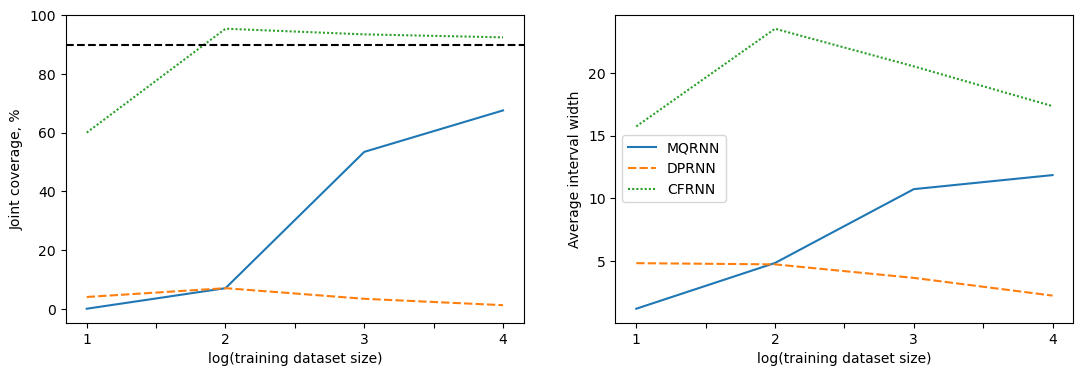

In [13]:
coverages_mean, coverages_std = {}, {}
for baseline in ['QRNN', 'DPRNN', 'CFRNN']:
    b = 'MQRNN' if baseline=='QRNN' else baseline
    coverages_mean[b], coverages_std[b] = \
        get_joint_coverages(baseline, 'sample_complexity', seeds=range(5))


widths_mean = {}
for baseline in ['QRNN', 'DPRNN', 'CFRNN']:
    b = 'MQRNN' if baseline=='QRNN' else baseline
    widths_mean[b], _ = \
        get_interval_widths(baseline, 'sample_complexity', seeds=range(5))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 4))

figa = sns.lineplot(ax=ax1, data=coverages_mean, legend=None)
ax1.set_xticklabels([0,1,'',2,'',3,'',4])
figa.axhline(90, linestyle="--", color="black")
figa.set(xlabel="log(training dataset size)", ylabel="Joint coverage, %")
    
figb = sns.lineplot(ax=ax2, data=widths_mean)
ax2.set_xticklabels([0,1,'',2,'',3,'',4])
figb.set(xlabel="log(training dataset size)", ylabel="Average interval width")
plt.show()
fig.savefig('{}.png'.format('sample_complexity'), bbox_inches='tight', dpi=600)

## Plotting

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


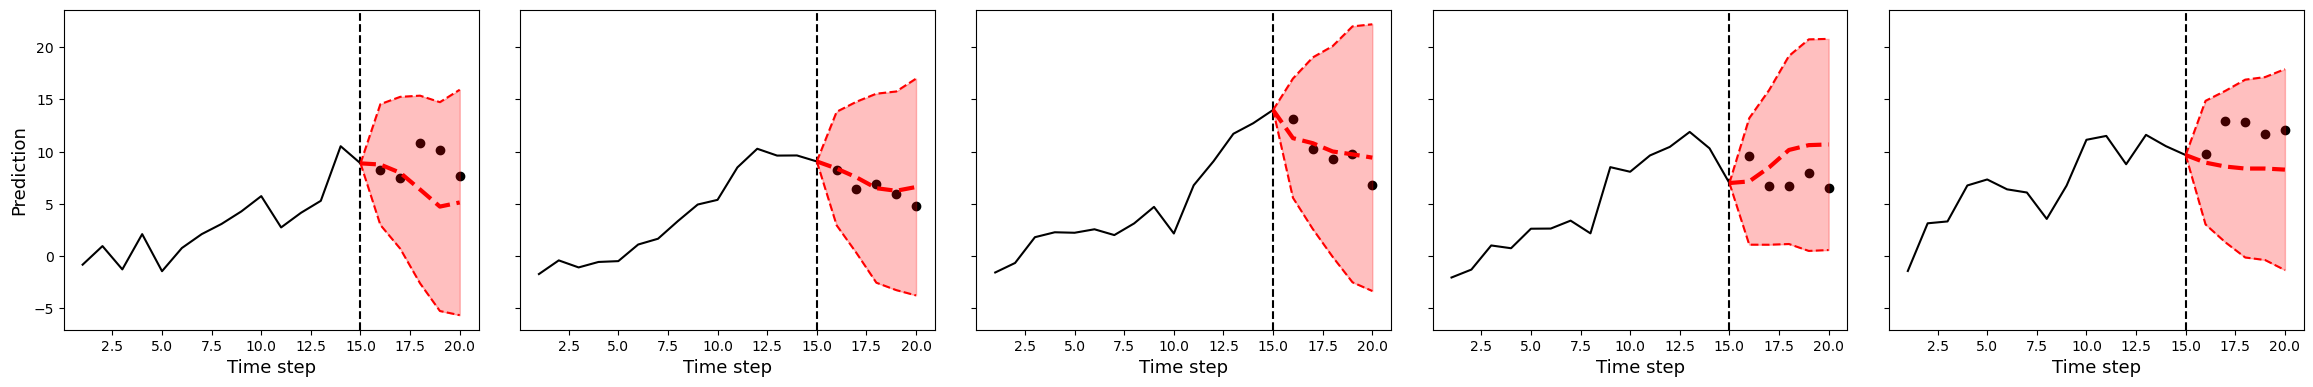

In [14]:
plot_timeseries(experiment='static', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_static')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


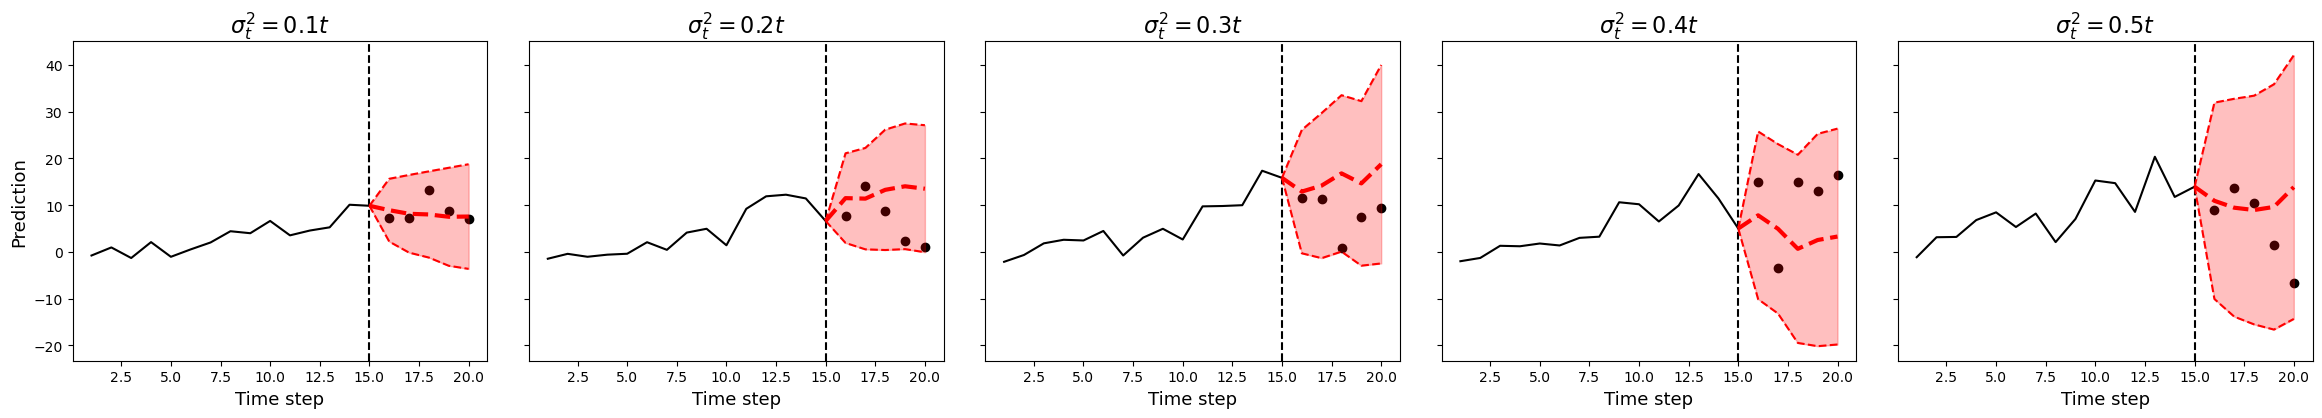

In [15]:
plot_timeseries(experiment='time_dependent', baseline='CFRNN', index=range(6,7), figure_name='CFRNN_time_dependent')

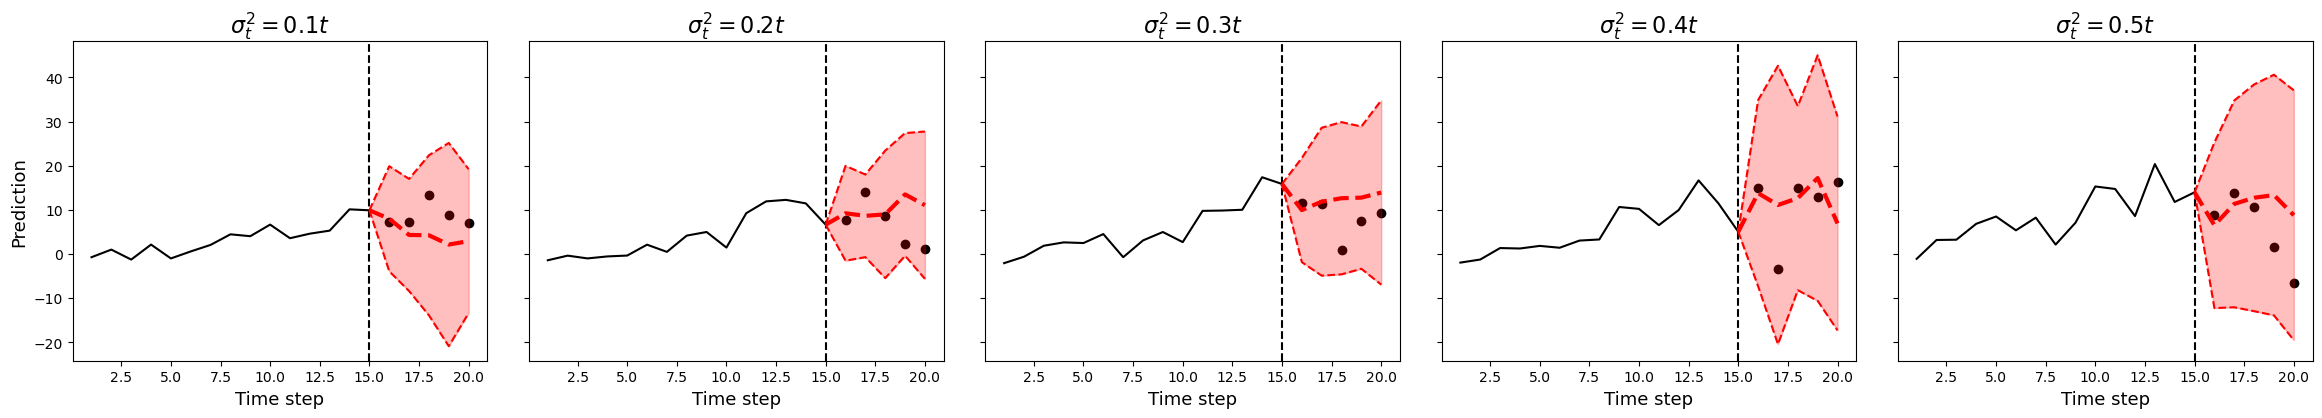

In [16]:
plot_timeseries(experiment='time_dependent', baseline='AdaptiveCFRNN', index=range(6,7), figure_name='CFRNN_adaptive')

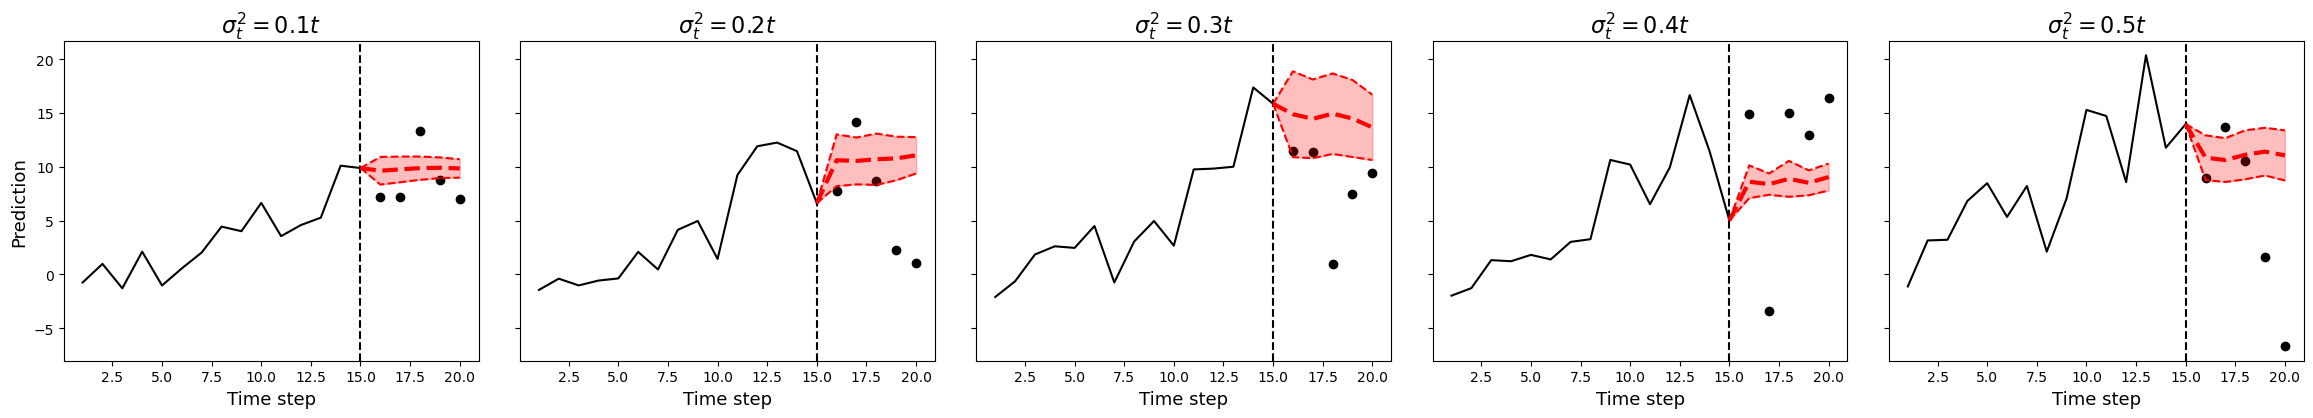

In [17]:
plot_timeseries(experiment='time_dependent', baseline='DPRNN', index=range(6,7), figure_name='DPRNN')

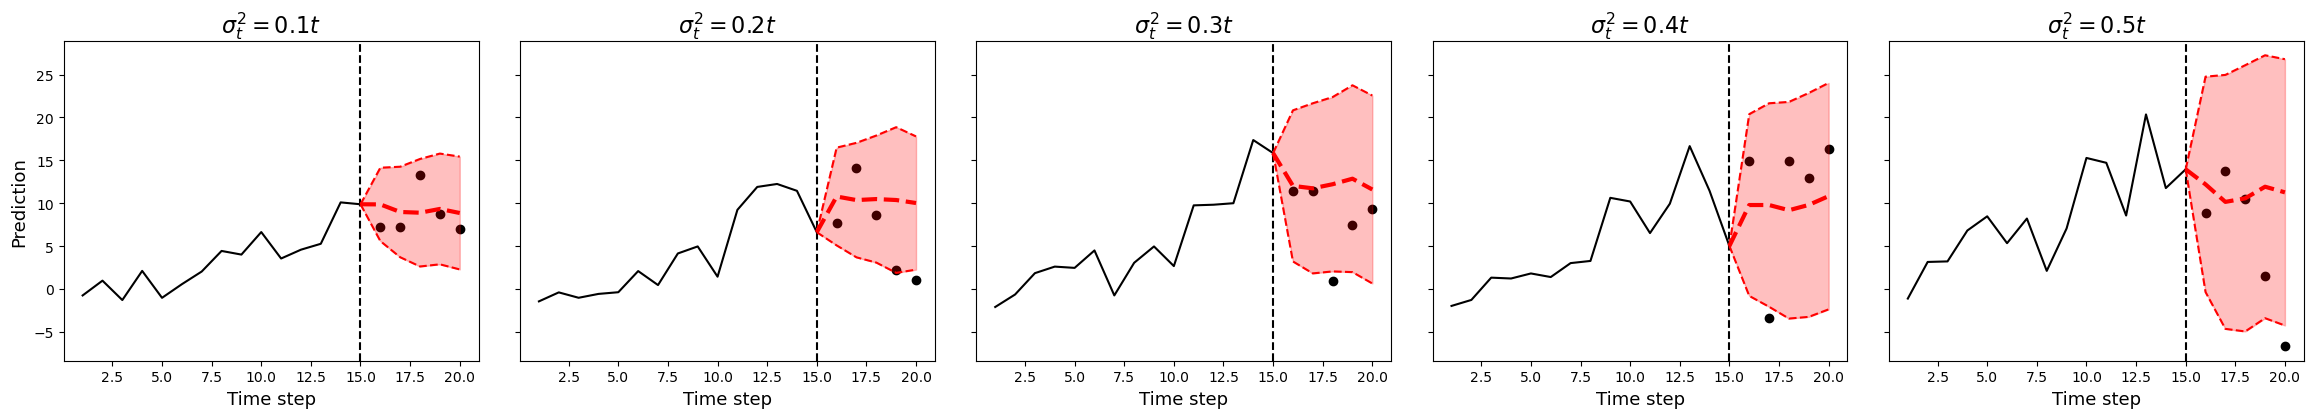

In [18]:
plot_timeseries(experiment='time_dependent', baseline='QRNN', index=range(6,7), figure_name='MQRNN')

## Long horizon analysis

Training code for the three underlying RNN models:

In [19]:
for rnn_mode in ['LSTM', 'RNN', 'GRU']:
    run_synthetic_experiments(experiment='static', 
                              baseline='CFRNN',
                              horizon=100,
                              retrain_auxiliary=True,
                              recompute_dataset=True,
                              save_model=True, 
                              save_results=False, 
                              rnn_mode=rnn_mode)

Training CFRNN
Training dataset 0
Epoch: 0	Train loss: 116.7393569946289
Epoch: 50	Train loss: 105.06383743286133
Epoch: 100	Train loss: 105.04619598388672
Epoch: 150	Train loss: 105.00663909912109
Epoch: 200	Train loss: 104.9149040222168
Epoch: 250	Train loss: 104.81817474365235
Epoch: 300	Train loss: 104.64081115722657
Epoch: 350	Train loss: 104.58361892700195
Epoch: 400	Train loss: 104.48317337036133
Epoch: 450	Train loss: 104.37363204956054
Epoch: 500	Train loss: 104.48942413330079
Epoch: 550	Train loss: 104.51539001464843
Epoch: 600	Train loss: 104.38988876342773
Epoch: 650	Train loss: 104.25618591308594
Epoch: 700	Train loss: 104.33077011108398
Epoch: 750	Train loss: 104.2760841369629
Epoch: 800	Train loss: 104.2999656677246
Epoch: 850	Train loss: 104.3826675415039
Epoch: 900	Train loss: 104.24081954956054
Epoch: 950	Train loss: 104.33663482666016
Training dataset 1
Epoch: 0	Train loss: 116.27248764038086
Epoch: 50	Train loss: 104.65753555297852
Epoch: 100	Train loss: 104.5824394

Analyzing interval widths:

In [20]:
import torch
widths = {}
n_train=2000
for rnn_model in ['LSTM', 'RNN', 'GRU']:
    model = torch.load('saved_models/static-CFRNN-{}-5-0-horizon100.pt'.format(rnn_model))
    
    ws = []
    alphas = np.arange(100) * 0.01
    for alpha in alphas:
        corrected_alpha = alpha / model.horizon
        corrected_critical_calibration_scores = torch.tensor([[
                torch.quantile(
                    position_calibration_scores,
                    q=1 - corrected_alpha * n_train / (n_train + 1))
                for position_calibration_scores in feature_calibration_scores]
                for feature_calibration_scores in model.calibration_scores]).T
        ws.append(corrected_critical_calibration_scores.flatten().tolist())
    ws = np.array(ws)
    ws = ws * 2
    widths[rnn_model] = ws

In [21]:
def compute_valid_horizons(threshold_width):
    valid_horizons = {}
    for rnn_model in ['LSTM', 'RNN', 'GRU']:    
        T = []
        ws = widths[rnn_model]
        for i, _ in enumerate(alphas):
            t = 0
            while t < ws.shape[1] and ws[i, t] < threshold_width:
                t += 1
            T.append(t)
        valid_horizons[rnn_model] = np.array(T)
    return valid_horizons

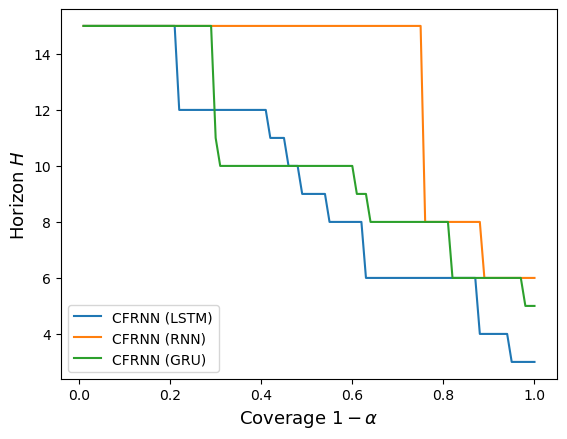

In [22]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'axes.titlesize': 16,
                     'axes.labelsize': 13})
for threshold_width in [28]:
    valid_horizons = compute_valid_horizons(threshold_width)
    for rnn_model in valid_horizons.keys():
        plt.plot(1-alphas, valid_horizons[rnn_model], label='CFRNN ({})'.format(rnn_model))
plt.xlabel('Coverage $1-\\alpha$')
plt.ylabel('Horizon $H$')
plt.legend()
plt.savefig('{}.png'.format('tradeoff') , bbox_inches='tight', dpi=1000)
plt.show()